<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
breast = load_breast_cancer()  #loading the dataset

In [3]:
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
breast.data.shape  #checking sample size

(569, 30)

In [5]:
breast.target.shape  #checking target size

(569,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    breast.data, breast.target, random_state=11)  #splitting the data into train and test sets

In [7]:
X_train.shape  #training set size (75%)

(426, 30)

In [8]:
X_test.shape  #testing set size (25%)

(143, 30)

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(X=X_train, y=y_train)  #training the model with the fit method

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
predicted = knn.predict(X=X_test) #predicting

In [12]:
expected = y_test

In [13]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [14]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [15]:
print(f'{knn.score(X_test, y_test):.2%}') #estimator method score

94.41%


In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion #confusion matrix

array([[43,  7],
       [ 1, 92]])

In [17]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

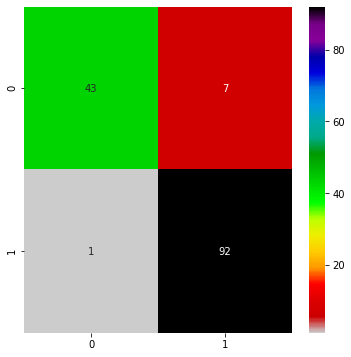

In [18]:
#visualizing the confusion matrix
figure = plt.figure(figsize=(6, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

In [19]:
#k-fold cross-validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=breast.data, 
          y=breast.target, cv=kfold)


In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [23]:
for estimator_name, estimator_object in estimators.items(): #running multiple models to find the best
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=breast.data, y=breast.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
